Лабораторная работа №5. "ДРЕВОВИДНЫЕ МОДЕЛИ: РЕШАЮЩИЕ ДЕРЕВЬЯ И ИХ КОМПОЗИЦИИ"

Задание №1.
A). Реализовать DecisionTreeClassifier и DecisionTreeRegressor из Sclearn для соответствующих наборов данных своего варианта. Осуществить настройку гиперпараметров. Выполнить оценку качества модели, визуализировать дерево решений, вывести решающие правила. Сравнить полученные результаты обучения моделей с данными, полученными с помощью PyCaret (открытая low-code библиотека ML на Python, см. Lab5_Ex3 DRs_classifier.ipynb)
B). Реализовать обучение и вычисление дерева с использованием алгоритма CART для задачи регрессии и задачи классификации. Выполнить оценку качества моделей, визуализировать дерево решений, вывести решающие правила.

Задание №2. Применить ансамбли для наборов данных своего варианта:
o BaggingClassifier
o BaggingRegressor

o GradientBoostingClassifier
o GradientBoostingRegressor

o StackingClassifier
o StackingRegressor

Выполнить оценку качества моделей и выбрать лучшую модель.

Задание №3. Реализовать для решения задачи регрессии и задачи классификации следующие библиотеки:
o Catboost,
o XGBoost,
o LightGBM
Выполнить оценку качества моделей и выбрать лучшую модель.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #если хотите использовать темы seaborn themes с matplotlib functions
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

import sys
sys.path.append(r"D:\university\ML\MyLib")
from CART import *
from regression_metrics import *


rand_state = 1000

# DecisionTreeClassifier

In [2]:
df_cl = pd.read_csv('../data/card_transdata.csv')

In [3]:
pd.crosstab(df_cl['fraud'],df_cl['fraud'], normalize='all')*100

fraud,0.0,1.0
fraud,,
0.0,91.2597,0.0000
1.0,0.0000,8.7403


In [4]:
y = df_cl['fraud']
X = df_cl.drop('fraud', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state, stratify=y)

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
Tree_classifier = DecisionTreeClassifier(random_state=rand_state-1)
Tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=999)

In [7]:
Tree_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 999,
 'splitter': 'best'}

In [8]:
Tree_classifier.get_depth()

7

In [9]:
y_pred = Tree_classifier.predict(X_test)

In [10]:
print(confusion_matrix(y_test, y_pred))

[[182519      0]
 [     0  17481]]


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182519
         1.0       1.00      1.00      1.00     17481

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



In [12]:
print('Training set score: {:.4f}'.format(Tree_classifier.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(Tree_classifier.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


[Text(0.49609375, 0.9375, 'ratio_to_median_purchase_price <= 4.0\ngini = 0.16\nsamples = 800000\nvalue = [730078, 69922]'),
 Text(0.20833333333333334, 0.8125, 'distance_from_home <= 100.003\ngini = 0.049\nsamples = 717521\nvalue = [699539, 17982]'),
 Text(0.09375, 0.6875, 'distance_from_last_transaction <= 50.028\ngini = 0.012\nsamples = 681786\nvalue = [677708, 4078]'),
 Text(0.041666666666666664, 0.5625, 'distance_from_last_transaction <= 50.001\ngini = 0.0\nsamples = 671634\nvalue = [671633, 1]'),
 Text(0.020833333333333332, 0.4375, 'gini = 0.0\nsamples = 671626\nvalue = [671626, 0]'),
 Text(0.0625, 0.4375, 'distance_from_last_transaction <= 50.004\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.041666666666666664, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08333333333333333, 0.3125, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.14583333333333334, 0.5625, 'online_order <= 0.5\ngini = 0.481\nsamples = 10152\nvalue = [6075, 4077]'),
 Text(0.125, 0.4375, 'g

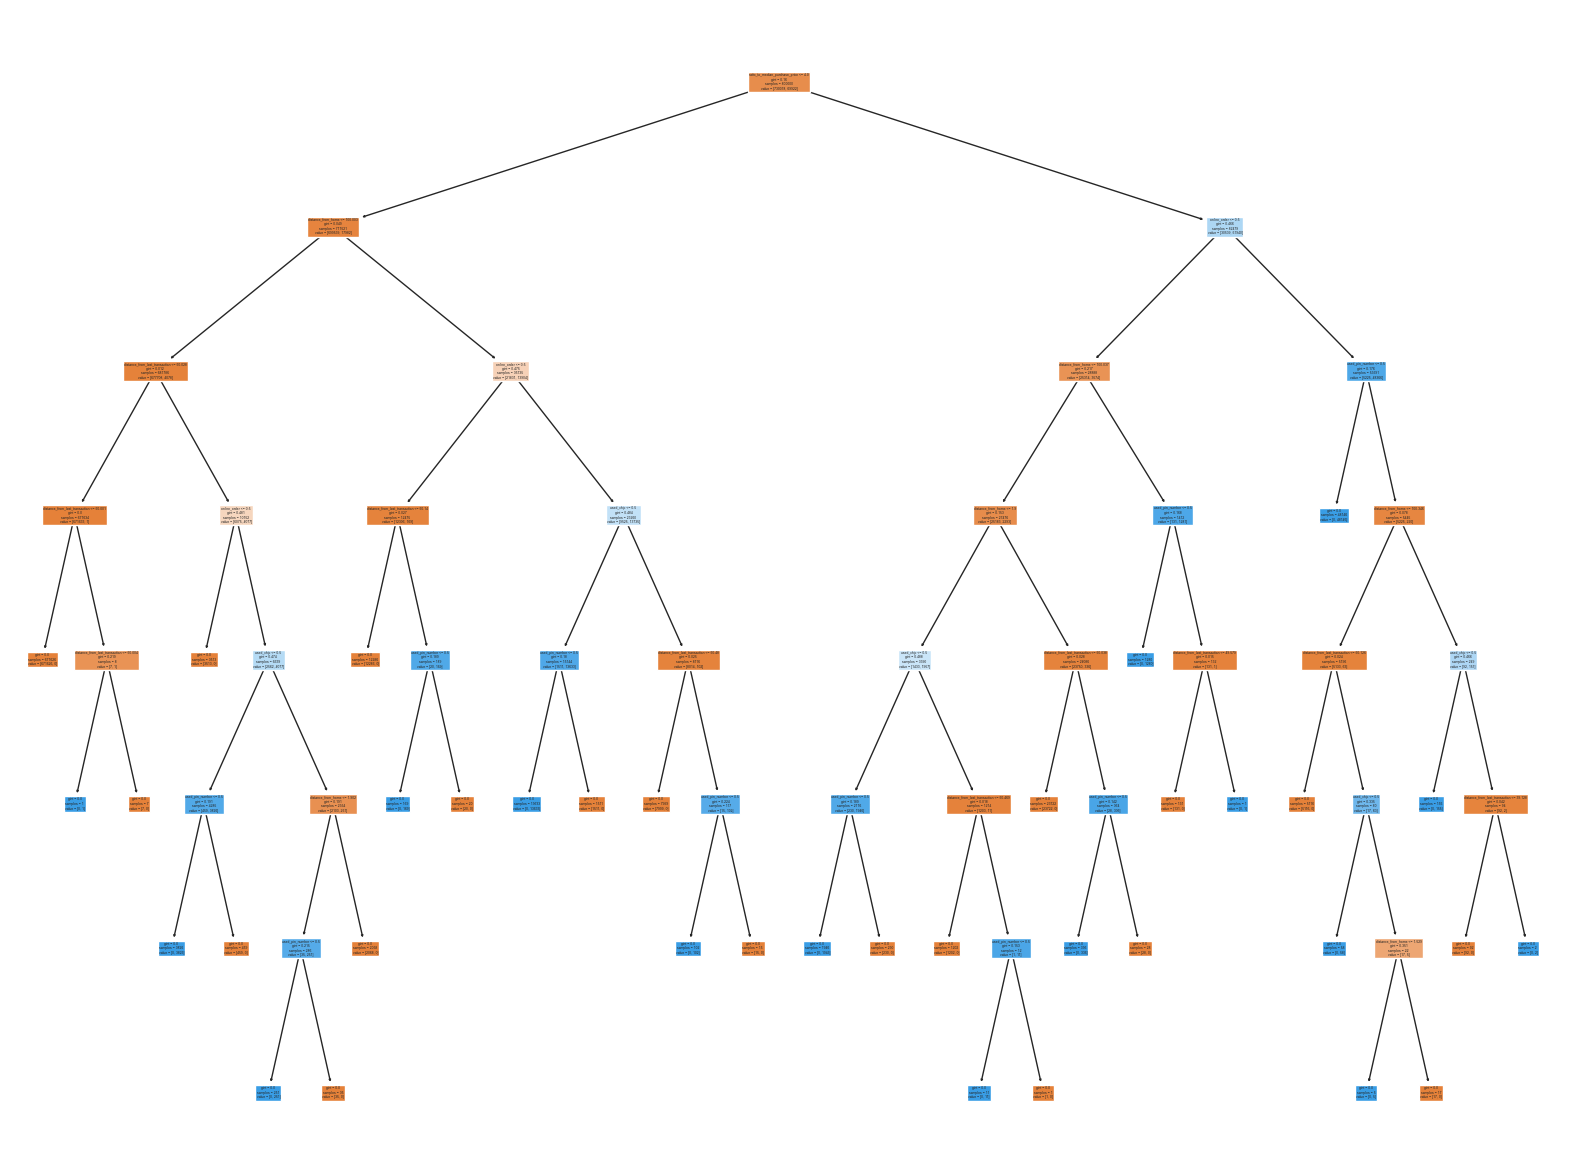

In [13]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20,15))
DT_plot =plot_tree(Tree_classifier, feature_names=list(X_train.columns), filled=True)
DT_plot

## PyCaret

In [14]:
from pycaret.utils import version
version()

'3.2.0'

In [15]:
from pycaret.classification import *

In [16]:
setup(data=df_cl,  target='fraud', session_id=555, train_size=0.7, preprocess=True)

,Description,Value
0,Session id,555
1,Target,fraud
2,Target type,Binary
3,Original data shape,"(1000000, 8)"
4,Transformed data shape,"(1000000, 8)"
5,Transformed train set shape,"(700000, 8)"
6,Transformed test set shape,"(300000, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [17]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [18]:
dt = create_model(estimator='dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,0.9997,0.9998,0.9998,0.9998
4,1.0000,0.9999,0.9998,1.0000,0.9999,0.9999,0.9999
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.9998,0.9997,1.0000,0.9998,0.9998,0.9998
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.9998,0.9997,1.0000,0.9998,0.9998,0.9998


## Ансамбли

In [19]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [20]:
BC = BaggingClassifier()
BC.fit(X_train, y_train)
y_pred_BagC = BC.predict(X_test)

In [21]:
Grad = GradientBoostingClassifier()
Grad.fit(X_train, y_train)
y_pred_GradC = Grad.predict(X_test)

In [22]:
estimators = [('rf', RandomForestClassifier())]

Stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
Stack.fit(X_train, y_train)
y_pred_StackC = Stack.predict(X_test)

In [23]:
print('Bag  Accuracy = {}'.format(accuracy_score(y_test, y_pred_BagC)))
print('Grad Accuracy = {}'.format(accuracy_score(y_test, y_pred_GradC)))
print('Stack Accuracy = {}'.format(accuracy_score(y_test, y_pred_StackC)))

Bag  Accuracy = 0.99999
Grad Accuracy = 0.99957
Stack Accuracy = 0.999995


## Catboost, XGboost, LightGBM

In [24]:
from catboost import CatBoostClassifier

catB = CatBoostClassifier(iterations=2, learning_rate=0.5, depth=10)

catB.fit(X_train, y_train)

y_pred_catB = catB.predict(X_test)

0:	learn: 0.3171157	total: 184ms	remaining: 184ms
1:	learn: 0.1751762	total: 228ms	remaining: 0us


In [25]:
print(classification_report(y_test, y_pred_catB))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182519
         1.0       0.99      0.99      0.99     17481

    accuracy                           1.00    200000
   macro avg       0.99      0.99      0.99    200000
weighted avg       1.00      1.00      1.00    200000



In [26]:
confusion_matrix(y_test, y_pred_catB)

array([[182275,    244],
       [   170,  17311]], dtype=int64)

In [27]:
from xgboost import XGBClassifier

XGB_classifier = XGBClassifier(eta=0.1, max_depth=10)
XGB_classifier.fit(X_train, y_train)

y_pred_xgbC = XGB_classifier.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred_xgbC))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182519
         1.0       0.99      0.99      0.99     17481

    accuracy                           1.00    200000
   macro avg       0.99      0.99      0.99    200000
weighted avg       1.00      1.00      1.00    200000



In [29]:
confusion_matrix(y_test, y_pred_xgbC)

array([[182357,    162],
       [   171,  17310]], dtype=int64)

In [30]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(force_row_wise=True)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 69922, number of negative: 730078
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.087402 -> initscore=-2.345771
[LightGBM] [Info] Start training from score -2.345771


In [31]:
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182519
         1.0       0.99      1.00      1.00     17481

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



In [32]:
confusion_matrix(y_test, y_pred_lgbm)

array([[182381,    138],
       [    29,  17452]], dtype=int64)

# DecisionTreeRegressor

In [33]:
df_r = pd.read_csv('../data/Lab3_Koren_Regression.csv')

In [34]:
y = df_r['Price']
X = df_r.drop(["Price"], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
Tree_regression = DecisionTreeRegressor(random_state=rand_state)
Tree_regression.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=1000, splitter='best')

In [37]:
Tree_regression.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1000,
 'splitter': 'best'}

In [38]:
Tree_regression.get_depth()

51

In [39]:
y_pred = Tree_regression.predict(X_test)

In [40]:
print('Training set score: {:.4f}'.format(Tree_regression.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(Tree_regression.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.7392


[Text(0.6237717796488514, 0.9903846153846154, 'Year <= 2011.5\nsquared_error = 27518343.702\nsamples = 23502\nvalue = 7375.735'),
 Text(0.3793125840083459, 0.9711538461538461, 'Year <= 2006.5\nsquared_error = 9469099.445\nsamples = 14852\nvalue = 4681.438'),
 Text(0.21152652311765616, 0.9519230769230769, 'Year <= 2001.5\nsquared_error = 5538261.552\nsamples = 8413\nvalue = 3360.592'),
 Text(0.12871478023217617, 0.9326923076923077, 'Engine_capacity <= 2051.5\nsquared_error = 5931964.889\nsamples = 3826\nvalue = 2538.604'),
 Text(0.10775392205129095, 0.9134615384615384, 'Vaz <= 0.5\nsquared_error = 5968519.869\nsamples = 3154\nvalue = 2329.325'),
 Text(0.08116087230790735, 0.8942307692307693, 'Engine_capacity <= 1799.5\nsquared_error = 4660074.211\nsamples = 2960\nvalue = 2241.285'),
 Text(0.05062279048553022, 0.875, 'Altele <= 0.5\nsquared_error = 5098908.991\nsamples = 1217\nvalue = 1938.492'),
 Text(0.04957832041638418, 0.8557692307692307, '405 <= 0.5\nsquared_error = 4768713.25\nsamp

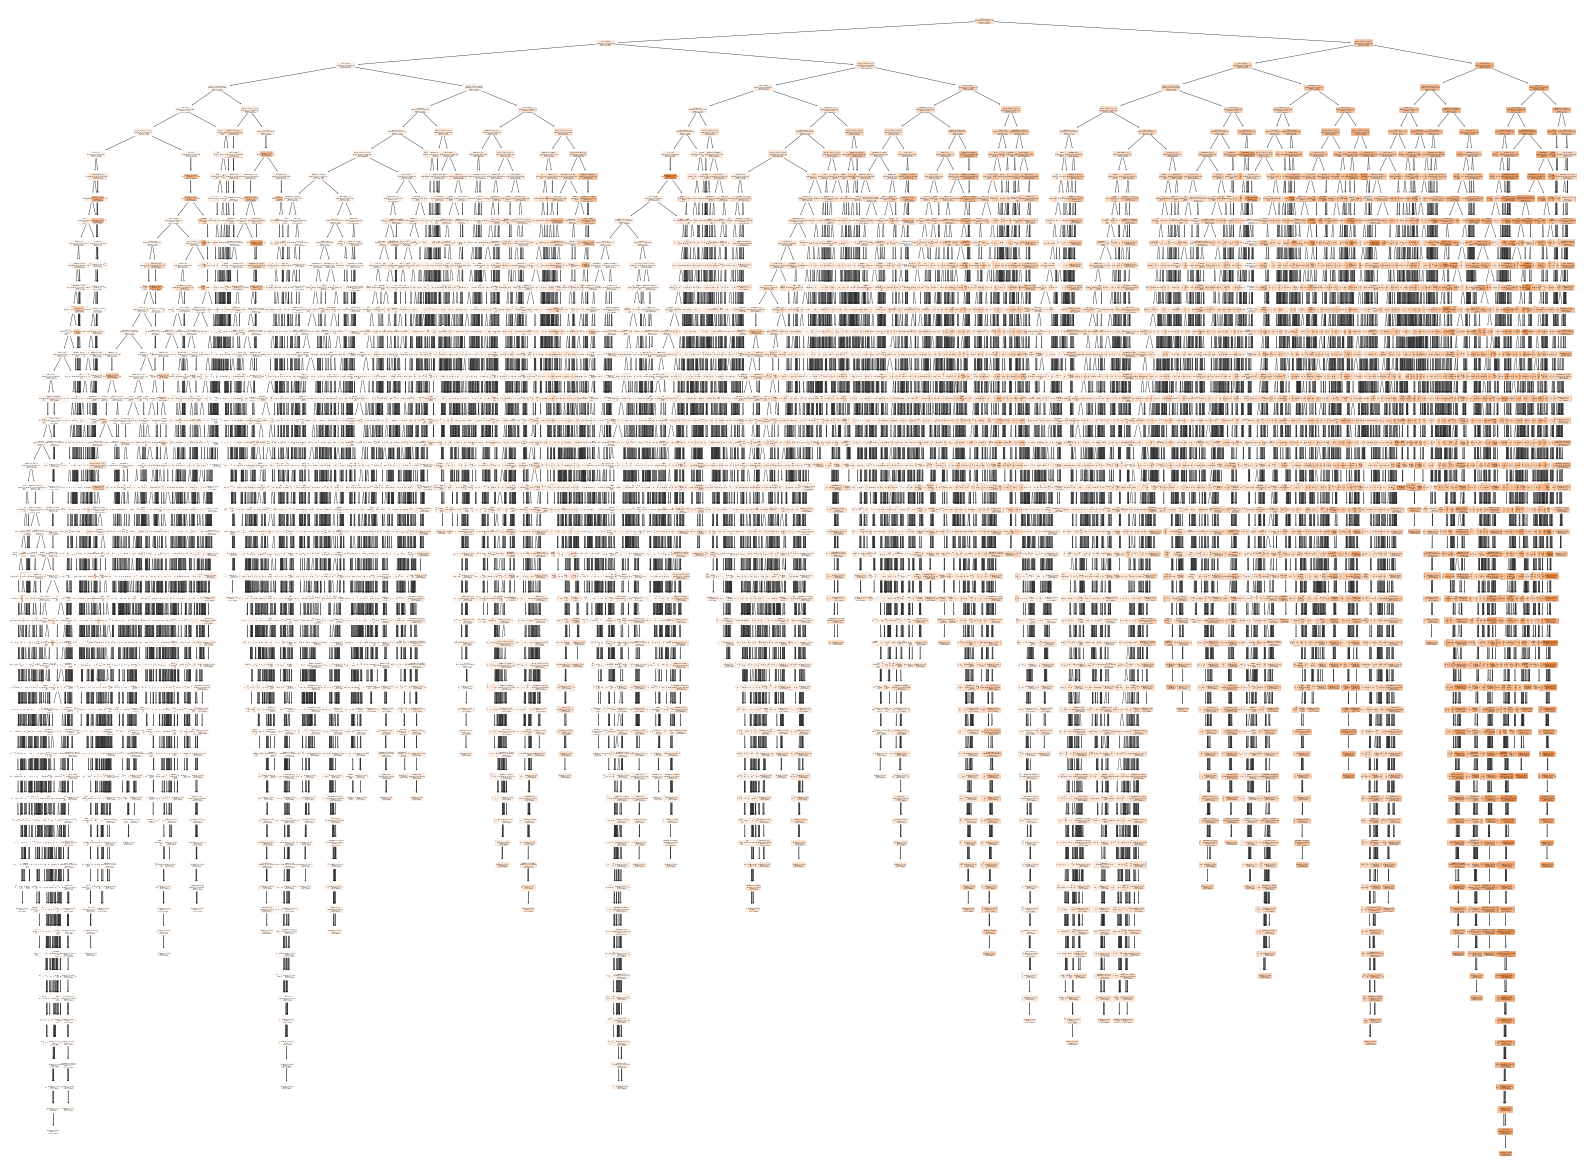

In [41]:
fig = plt.figure(figsize=(20,15))
DT_plot =plot_tree(Tree_regression, feature_names=list(X_train.columns), filled=True)
DT_plot

In [42]:
parameters = {'max_depth': np.arange(1, 70, 1)}

reg_opt = GridSearchCV(DecisionTreeRegressor(), parameters).fit(X_train, y_train)
reg_opt.best_params_

{'max_depth': 8}

In [43]:
Tree_regression_opt = DecisionTreeRegressor(max_depth=reg_opt.best_params_['max_depth'])
Tree_regression_opt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')

In [44]:
print('Training set score: {:.4f}'.format(Tree_regression_opt.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(Tree_regression_opt.score(X_test, y_test)))

Training set score: 0.8285
Test set score: 0.7907


[Text(0.48819742489270385, 0.9444444444444444, 'Year <= 2011.5\nsquared_error = 27518343.702\nsamples = 23502\nvalue = 7375.735'),
 Text(0.22713251072961374, 0.8333333333333334, 'Year <= 2006.5\nsquared_error = 9469099.445\nsamples = 14852\nvalue = 4681.438'),
 Text(0.10488197424892703, 0.7222222222222222, 'Year <= 2001.5\nsquared_error = 5538261.552\nsamples = 8413\nvalue = 3360.592'),
 Text(0.050965665236051505, 0.6111111111111112, 'Engine_capacity <= 2051.5\nsquared_error = 5931964.889\nsamples = 3826\nvalue = 2538.604'),
 Text(0.028969957081545063, 0.5, 'Vaz <= 0.5\nsquared_error = 5968519.869\nsamples = 3154\nvalue = 2329.325'),
 Text(0.016094420600858368, 0.3888888888888889, 'Engine_capacity <= 1799.5\nsquared_error = 4660074.211\nsamples = 2960\nvalue = 2241.285'),
 Text(0.008583690987124463, 0.2777777777777778, 'Altele <= 0.5\nsquared_error = 5098908.991\nsamples = 1217\nvalue = 1938.492'),
 Text(0.004291845493562232, 0.16666666666666666, '405 <= 0.5\nsquared_error = 4768713.25

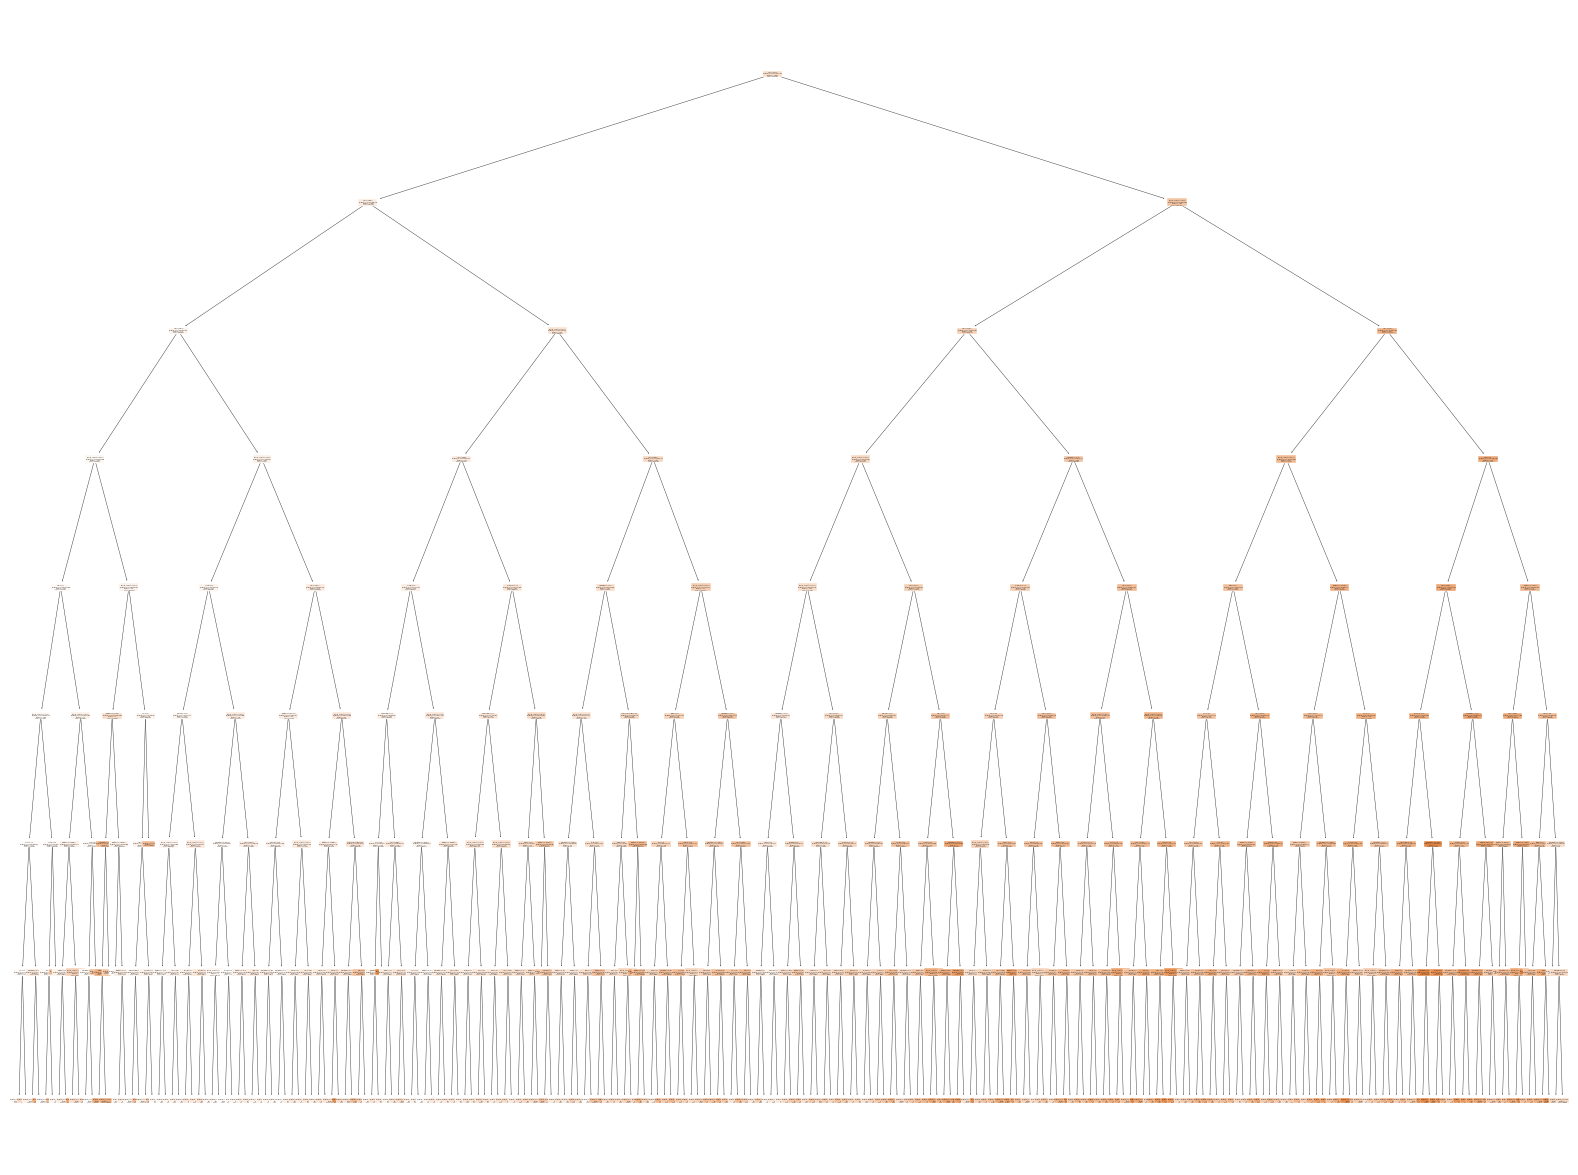

In [45]:
fig = plt.figure(figsize=(20,15))
DT_plot =plot_tree(Tree_regression_opt, feature_names=list(X_train.columns), filled=True)
DT_plot

## PyCaret

In [46]:
from pycaret.regression import *

In [47]:
df_r_PyC = pd.read_csv('../data/moldova_cars_task.csv')
setup(data=df_r_PyC,  target='Price(euro)', session_id=555, train_size=0.7, preprocess=True)

,Description,Value
0,Session id,555
1,Target,Price(euro)
2,Target type,Regression
3,Original data shape,"(41007, 9)"
4,Transformed data shape,"(41007, 25)"
5,Transformed train set shape,"(28704, 25)"
6,Transformed test set shape,"(12303, 25)"
7,Ordinal features,1
8,Numeric features,3
9,Categorical features,5


In [48]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [49]:
dt_r = create_model(estimator='dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2324.2621,41623495.7262,6451.6274,0.6447,0.5785,0.3974
1,2148.3588,24895164.3164,4989.5054,0.6751,0.5576,0.4693
2,2224.4600,43421593.5766,6589.5063,0.6149,0.5706,0.4608
3,2264.2950,36801336.0626,6066.4105,0.6246,0.5543,1.1191
4,2168.8842,34819579.7559,5900.8118,0.6127,0.5525,0.4618
5,2191.0796,30704934.4322,5541.2033,0.6928,0.5513,0.4673
6,2180.2924,31713051.1217,5631.4342,0.6943,0.5829,0.4779
7,2227.0470,29527652.2373,5433.9352,0.6876,0.5487,0.4471
8,2348.6637,105921027.1239,10291.7942,-0.0958,0.5420,0.4808


In [50]:
tuned_dt_r = tune_model(dt_r)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2270.0274,31390951.5325,5602.7628,0.7321,0.4551,0.3707
1,2161.6863,28765620.8795,5363.3591,0.6246,0.4787,0.4033
2,2198.0850,38714953.5576,6222.1342,0.6566,0.4824,0.4118
3,2102.4687,23669549.5645,4865.1361,0.7585,0.4714,1.1138
4,2093.0959,20519054.6125,4529.7963,0.7718,0.4569,0.3907
5,2098.4571,24672182.5165,4967.1101,0.7531,0.4833,0.4247
6,2128.9238,20105351.2422,4483.8991,0.8062,0.4976,0.4506
7,2064.9999,20237964.2138,4498.6625,0.7859,0.4509,0.3692
8,2139.7877,23731201.5587,4871.4681,0.7545,0.4850,0.5794


Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Ансамбли

In [51]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, StackingRegressor, RandomForestRegressor

In [52]:
BR = BaggingRegressor()
BR.fit(X_train, y_train)
y_pred_BR = BR.predict(X_test)

In [53]:
Grad = GradientBoostingRegressor()
Grad.fit(X_train, y_train)
y_pred_Grad = Grad.predict(X_test)

In [54]:
from sklearn.linear_model import Ridge
estimators = [('lr', Ridge())]

Stack = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())
Stack.fit(X_train, y_train)
y_pred_Stack = Stack.predict(X_test)

In [55]:
print('Bag  Accuracy = {}'.format(BR.score(X_test, y_test)))
print('Grad Accuracy = {}'.format(Grad.score(X_test, y_test)))
print('Stack Accuracy = {}'.format(Stack.score(X_test, y_test)))

Bag  Accuracy = 0.845397485069509
Grad Accuracy = 0.8249892348734856
Stack Accuracy = 0.7396296935690134


## Catboost, XGboost, LightGBM

In [56]:
from catboost import CatBoostRegressor

catB = CatBoostRegressor(iterations=2,
                          learning_rate=0.5,
                          depth=10)

catB.fit(X_train.drop(['Coupe', 'Roadster'], axis=1), y_train)

y_pred_catB = catB.predict(X_test.drop(['Coupe', 'Roadster'], axis=1))
print(catB.score(X_test.drop(['Coupe', 'Roadster'], axis=1), y_test))

0:	learn: 3512.2261986	total: 40.7ms	remaining: 40.7ms
1:	learn: 2744.0747597	total: 64.4ms	remaining: 0us
0.7200907114566504


In [57]:
from xgboost import XGBRegressor

XGB_regressor = XGBRegressor(eta=0.1, max_depth=6)
XGB_regressor.fit(X_train.drop(['Coupe', 'Roadster'], axis=1), y_train)

y_pred_xgb = XGB_regressor.predict(X_test.drop(['Coupe', 'Roadster'], axis=1))
print(XGB_regressor.score(X_test.drop(['Coupe', 'Roadster'], axis=1), y_test))

0.8540067565231118


In [58]:
'''from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(force_row_wise=True)
lgbm.fit(X_train.drop(['Coupe', 'Roadster'], axis=1), y_train)

y_pred_lgbm = lgbm.predict(X_test.drop(['Coupe', 'Roadster'], axis=1))
print(lgbm.score(X_test.drop(['Coupe', 'Roadster'], axis=1), y_test))'''

"from lightgbm import LGBMRegressor\n\nlgbm = LGBMRegressor(force_row_wise=True)\nlgbm.fit(X_train.drop(['Coupe', 'Roadster'], axis=1), y_train)\n\ny_pred_lgbm = lgbm.predict(X_test.drop(['Coupe', 'Roadster'], axis=1))\nprint(lgbm.score(X_test.drop(['Coupe', 'Roadster'], axis=1), y_test))"

# CART

In [21]:
df_cl = pd.read_csv('../data/card_transdata.csv')

In [22]:
y = (df_cl['fraud'])[:20000]
X = (df_cl.drop('fraud', axis=1))[:20000]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state, stratify=y)

In [23]:
Tree_classifier = CART(max_depth=10, min_samples_split=5)

In [24]:
Tree_classifier.fit(X_train, y_train)

In [25]:
y_pred = Tree_classifier.predict(X_test)

In [26]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [27]:
print(confusion_matrix(y_test, y_pred))

[[3657    0]
 [   1  342]]


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3657
         1.0       1.00      1.00      1.00       343

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [10]:
df_r = pd.read_csv('../data/Lab3_Koren_Regression.csv')

In [11]:
y = df_r['Price'][:2000]
X = df_r.drop(["Price"], axis=1)[:2000]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [12]:
Tree_regression = CART(criterion='mse', max_depth=10, min_samples_split=10)
Tree_regression.fit(X_train, y_train)

In [13]:
y_pred = Tree_regression.predict(X_test)

In [14]:
#from sklearn.metrics import mean_squared_error

In [15]:
y_test = y_test.values.reshape(-1,1)

In [16]:
print(f'MAE: {mae(y_test, y_pred)}')
print(f'MSE: {mse(y_test, y_pred)}')
print(f'RMSE: {rmse(y_test, y_pred)}')
print(f'MAPE: {mape(y_test, y_pred)}')
print(f'R^2: {r2(y_test, y_pred)}')

MAE: [1469.63109572]
MSE: [4645835.45185931]
RMSE: 2155.4200175045494
MAPE: [0.49290636]
R^2: [0.83128156]


In [ ]:
import numpy as np
from statistics import mode


class Node:
    def __init__(self, depth):
        self.value = None
        self.left = None
        self.right = None
        self.depth = depth

    '''def get_left(self):
        return self.left

    def get_right(self):
        return self.right'''


class Split:
    def __init__(self, feature, threshold):
        self.feature = feature
        self.threshold = threshold


class CART:
    def __init__(self, criterion='gini', max_depth=None, min_samples_split=2):
        criterions = {
            'gini': self.__gini,
            'mse': self.__mse
        }
        self.criterion = criterions[criterion]
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def fit(self, X, y):
        self.tree_root = self.__build_children(Node(depth=0), X, y)

    def predict(self, X):
        return np.array([self.__pred(x, self.tree_root) for ind, x in X.iterrows()])

    def __build_children(self, node, X, y):
        if (self.max_depth and node.depth >= self.max_depth) or X.shape[0] <= self.min_samples_split:
            node.value = self.__find_value(y)
            return node
        split, data_split = self.__best_split(X, y)
        if y[data_split[0]].empty or y[data_split[1]].empty:
            if y[data_split[0]].empty:
                node.value = self.__find_value(y[data_split[1]])
            else:
                node.value = self.__find_value(y[data_split[0]])
            return node
        node.value = split
        node.left = self.__build_children(Node(node.depth+1), X[data_split[0]], y[data_split[0]])
        node.right = self.__build_children(Node(node.depth+1), X[data_split[1]], y[data_split[1]])
        return node

    def __best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_split = None
        best_param = float('inf')
        for feature in X.keys():
            thresholds = X[feature].unique()
            for threshold in thresholds:
                split_left, split_right = self.__split(X, feature, threshold)
                param = self.criterion(y[split_left], y[split_right])
                if param < best_param:
                    best_param = param
                    best_feature = feature
                    best_threshold = threshold
                    best_split = [split_left, split_right]
        return Split(feature=best_feature, threshold=best_threshold), best_split

    def __split(self, X, feature, threshold):
        return X.loc[:, feature] <= threshold, X.loc[:, feature] > threshold

    def __pred(self, x, node):
        if type(node.value) is not Split:
            return node.value
        feature, threshold = node.value.feature, node.value.threshold
        if x[feature] <= threshold:
            return self.__pred(x, node.left)
        else:
            return self.__pred(x, node.right)

    def __gini(self, left, right):
        left_gini = 1 - np.sum((np.bincount(left) / len(left)) ** 2)
        right_gini = 1 - np.sum((np.bincount(right) / len(right)) ** 2)
        gini = (len(left) * left_gini + len(right) * right_gini) / (len(left) + len(right))
        return gini

    def __mse(self, left, right):
        left_mse = np.mean((left - np.mean(left)) ** 2)
        right_mse = np.mean((right - np.mean(right)) ** 2)
        mse = (len(left) * left_mse + len(right) * right_mse) / (len(left) + len(right))
        return mse

    def __find_value(self, y):
        if self.criterion == self.__mse:
            return np.mean(y)
        if self.criterion == self.__gini:
            return mode(y.loc[:y.keys()[0]])
